In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [13]:
import requests
requests.__version__

'2.24.0'

In [14]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8f95288aff6efbb2bc949446d3faefe9


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8f95288aff6efbb2bc949446d3faefe9&q=Boston


In [17]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [18]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [19]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [20]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10n"}],"base":"stations","main":{"temp":56.16,"feels_like":54.34,"temp_min":54,"temp_max":57,"pressure":997,"humidity":96},"visibility":81,"wind":{"speed":5.99,"deg":294,"gust":13},"rain":{"1h":0.24},"clouds":{"all":100},"dt":1616972843,"sys":{"type":3,"id":2013408,"country":"US","sunrise":1616927586,"sunset":1616972705},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [21]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 56.16,
  'feels_like': 54.34,
  'temp_min': 54,
  'temp_max': 57,
  'pressure': 997,
  'humidity': 96},
 'visibility': 81,
 'wind': {'speed': 5.99, 'deg': 294, 'gust': 13},
 'rain': {'1h': 0.24},
 'clouds': {'all': 100},
 'dt': 1616972843,
 'sys': {'type': 3,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1616927586,
  'sunset': 1616972705},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [22]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [23]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [24]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8f95288aff6efbb2bc949446d3faefe9&q=Bston


In [25]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 56.16,
  'feels_like': 54.34,
  'temp_min': 54,
  'temp_max': 57,
  'pressure': 997,
  'humidity': 96},
 'visibility': 81,
 'wind': {'speed': 5.99, 'deg': 294, 'gust': 13},
 'rain': {'1h': 0.24},
 'clouds': {'all': 100},
 'dt': 1616972843,
 'sys': {'type': 3,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1616927586,
  'sunset': 1616972705},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [26]:
# Get the JSON data.
boston_data = city_weather.json()

In [27]:
boston_data["sys"]["country"]

'US'

In [28]:
boston_data["dt"]

1616972843

In [29]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 57 96 100 5.99


In [30]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-03-28 23:07:23'

In [31]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [32]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 13 | aklavik
Processing Record 3 of Set 13 | east london
Processing Record 4 of Set 13 | jamestown
Processing Record 5 of Set 13 | gaomi
Processing Record 6 of Set 13 | mataura
Processing Record 7 of Set 13 | rikitea
Processing Record 8 of Set 13 | carnarvon
Processing Record 9 of Set 13 | bluff
Processing Record 10 of Set 13 | upernavik
Processing Record 11 of Set 13 | ushuaia
Processing Record 12 of Set 13 | dikson
Processing Record 13 of Set 13 | narrabri
Processing Record 14 of Set 13 | amderma
City not found. Skipping...
Processing Record 15 of Set 13 | norman wells
Processing Record 16 of Set 13 | anchorage
Processing Record 17 of Set 13 | longyearbyen
Processing Record 18 of Set 13 | linfen
Processing Record 19 of Set 13 | tual
Processing Record 20 of Set 13 | nanortalik
Processing Record 21 of Set 13 | toora-khem
Pro

Processing Record 33 of Set 16 | guozhen
Processing Record 34 of Set 16 | antalaha
Processing Record 35 of Set 16 | xinzhi
Processing Record 36 of Set 16 | kaitangata
Processing Record 37 of Set 16 | kaoma
Processing Record 38 of Set 16 | ostrovnoy
Processing Record 39 of Set 16 | emba
Processing Record 40 of Set 16 | san francisco
Processing Record 41 of Set 16 | qaanaaq
Processing Record 42 of Set 16 | matara
Processing Record 43 of Set 16 | cacu
Processing Record 44 of Set 16 | sainte-luce-sur-loire
Processing Record 45 of Set 16 | ponta do sol
Processing Record 46 of Set 16 | andevoranto
City not found. Skipping...
Processing Record 47 of Set 16 | kodiak
Processing Record 48 of Set 16 | nishihara
Processing Record 49 of Set 16 | hasaki
Processing Record 50 of Set 16 | padre bernardo
Processing Record 1 of Set 17 | cap-aux-meules
Processing Record 2 of Set 17 | kyren
Processing Record 3 of Set 17 | bathsheba
Processing Record 4 of Set 17 | martapura
Processing Record 5 of Set 17 | e

Processing Record 17 of Set 20 | tahta
Processing Record 18 of Set 20 | georgetown
Processing Record 19 of Set 20 | tazovskiy
Processing Record 20 of Set 20 | comodoro rivadavia
Processing Record 21 of Set 20 | havre-saint-pierre
Processing Record 22 of Set 20 | menongue
Processing Record 23 of Set 20 | constitucion
Processing Record 24 of Set 20 | khuzhir
Processing Record 25 of Set 20 | tabialan
City not found. Skipping...
Processing Record 26 of Set 20 | meulaboh
Processing Record 27 of Set 20 | takaka
Processing Record 28 of Set 20 | el socorro
Processing Record 29 of Set 20 | laguna
Processing Record 30 of Set 20 | mana
Processing Record 31 of Set 20 | bayan
Processing Record 32 of Set 20 | porto novo
Processing Record 33 of Set 20 | chabahar
Processing Record 34 of Set 20 | xining
Processing Record 35 of Set 20 | laguna de perlas
Processing Record 36 of Set 20 | cabra
Processing Record 37 of Set 20 | lompoc
Processing Record 38 of Set 20 | yanan
City not found. Skipping...
Proces

Processing Record 2 of Set 24 | kaupanger
Processing Record 3 of Set 24 | tamiahua
Processing Record 4 of Set 24 | mkuranga
Processing Record 5 of Set 24 | dongsheng
Processing Record 6 of Set 24 | darhan
Processing Record 7 of Set 24 | lac du bonnet
Processing Record 8 of Set 24 | oktyabrskiy
Processing Record 9 of Set 24 | waingapu
Processing Record 10 of Set 24 | chkalovsk
Processing Record 11 of Set 24 | mackenzie
Processing Record 12 of Set 24 | kimry
Processing Record 13 of Set 24 | nouakchott
Processing Record 14 of Set 24 | saint-georges
Processing Record 15 of Set 24 | fez
Processing Record 16 of Set 24 | kingaroy
Processing Record 17 of Set 24 | san vicente
Processing Record 18 of Set 24 | ballina
Processing Record 19 of Set 24 | puerto baquerizo moreno
Processing Record 20 of Set 24 | nhulunbuy
Processing Record 21 of Set 24 | celestun
Processing Record 22 of Set 24 | talnakh
Processing Record 23 of Set 24 | punta alta
Processing Record 24 of Set 24 | kidal
Processing Record

In [33]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aklavik,68.2191,-135.0107,-5.80,59,44,6.91,CA,2021-03-28 23:09:58
1,East London,-33.0153,27.9116,65.39,77,100,13.31,ZA,2021-03-28 23:08:26
2,Jamestown,42.0970,-79.2353,39.99,93,90,22.82,US,2021-03-28 23:06:50
3,Gaomi,36.3833,119.7528,55.00,66,90,2.24,CN,2021-03-28 23:09:59
4,Mataura,-46.1927,168.8643,60.01,95,37,8.99,NZ,2021-03-28 23:09:59
5,Rikitea,-23.1203,-134.9692,79.20,73,3,15.55,PF,2021-03-28 23:06:20
6,Carnarvon,-24.8667,113.6333,71.60,100,40,4.61,AU,2021-03-28 23:10:00
7,Bluff,-46.6000,168.3333,60.01,95,85,8.99,NZ,2021-03-28 23:10:00
8,Upernavik,72.7868,-56.1549,-23.87,79,23,4.50,GL,2021-03-28 23:07:08
9,Ushuaia,-54.8000,-68.3000,46.40,61,75,14.97,AR,2021-03-28 23:07:09


In [34]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [35]:
city_data_df =city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Aklavik,CA,2021-03-28 23:09:58,68.2191,-135.0107,-5.80,59,44,6.91
1,East London,ZA,2021-03-28 23:08:26,-33.0153,27.9116,65.39,77,100,13.31
2,Jamestown,US,2021-03-28 23:06:50,42.0970,-79.2353,39.99,93,90,22.82
3,Gaomi,CN,2021-03-28 23:09:59,36.3833,119.7528,55.00,66,90,2.24
4,Mataura,NZ,2021-03-28 23:09:59,-46.1927,168.8643,60.01,95,37,8.99
5,Rikitea,PF,2021-03-28 23:06:20,-23.1203,-134.9692,79.20,73,3,15.55
6,Carnarvon,AU,2021-03-28 23:10:00,-24.8667,113.6333,71.60,100,40,4.61
7,Bluff,NZ,2021-03-28 23:10:00,-46.6000,168.3333,60.01,95,85,8.99
8,Upernavik,GL,2021-03-28 23:07:08,72.7868,-56.1549,-23.87,79,23,4.50
9,Ushuaia,AR,2021-03-28 23:07:09,-54.8000,-68.3000,46.40,61,75,14.97


In [36]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

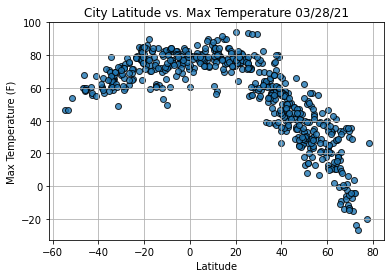

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

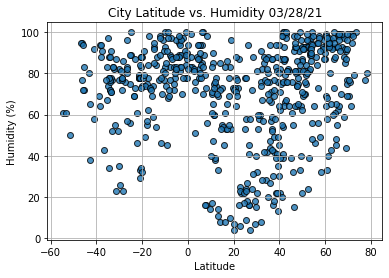

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

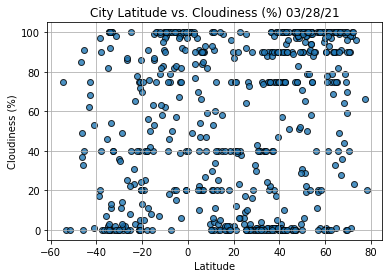

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

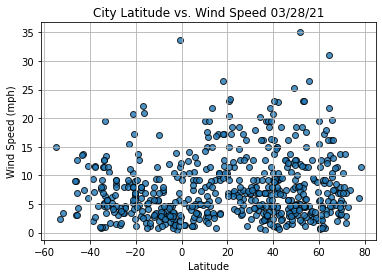

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [42]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [43]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
 

In [44]:
index13 = city_data_df.loc[13]
index13

City                    Anchorage
Country                        US
Date          2021-03-28 23:05:19
Lat                       61.2181
Lng                        -149.9
Max Temp                     33.8
Humidity                       40
Cloudiness                     40
Wind Speed                   4.61
Name: 13, dtype: object

In [45]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
575     True
576     True
577     True
578     True
579     True
Name: Lat, Length: 580, dtype: bool

In [46]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Aklavik,CA,2021-03-28 23:09:58,68.2191,-135.0107,-5.80,59,44,6.91
2,Jamestown,US,2021-03-28 23:06:50,42.0970,-79.2353,39.99,93,90,22.82
3,Gaomi,CN,2021-03-28 23:09:59,36.3833,119.7528,55.00,66,90,2.24
8,Upernavik,GL,2021-03-28 23:07:08,72.7868,-56.1549,-23.87,79,23,4.50
10,Dikson,RU,2021-03-28 23:10:01,73.5069,80.5464,-26.64,100,96,7.40


In [47]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

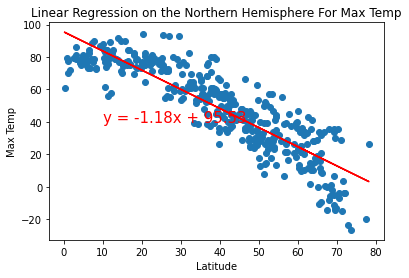

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere For Max Temp")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


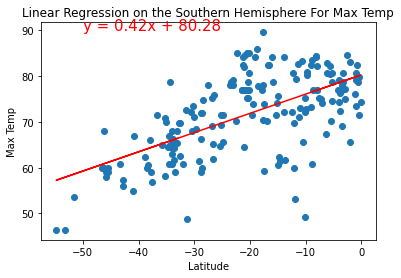

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere For Max Temp")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

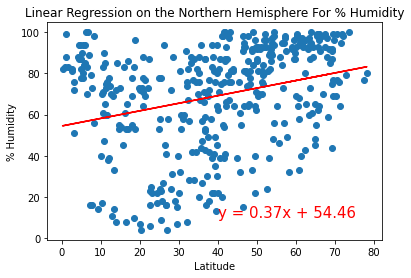

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere For % Humidity")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

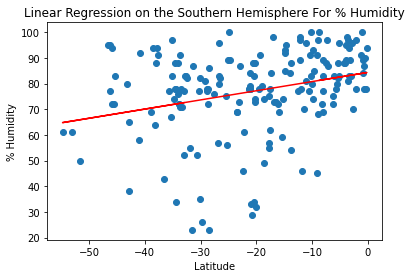

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere For % Humidity")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

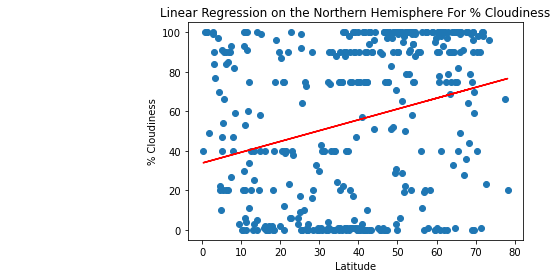

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere For % Cloudiness")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

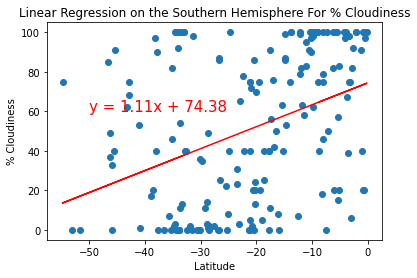

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere For % Cloudiness")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

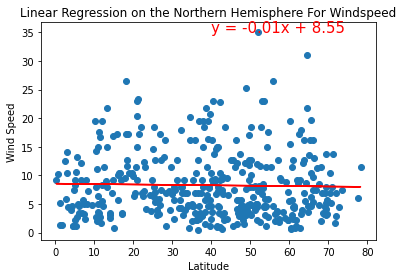

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere For Windspeed")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

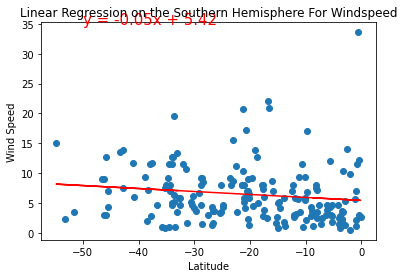

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere For Windspeed")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [56]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [57]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Aklavik,CA,2021-03-28 23:09:58,68.2191,-135.0107,-5.80,59,44,6.91
1,1,East London,ZA,2021-03-28 23:08:26,-33.0153,27.9116,65.39,77,100,13.31
2,2,Jamestown,US,2021-03-28 23:06:50,42.0970,-79.2353,39.99,93,90,22.82
3,3,Gaomi,CN,2021-03-28 23:09:59,36.3833,119.7528,55.00,66,90,2.24
4,4,Mataura,NZ,2021-03-28 23:09:59,-46.1927,168.8643,60.01,95,37,8.99


In [58]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [59]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [60]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [61]:
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

In [62]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=temps, dissipating=False, max_intensity=300, point_radius=4)
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [63]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [64]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [65]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [67]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [68]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,5,Rikitea,PF,2021-03-28 23:06:20,-23.1203,-134.9692,79.20,73,3,15.55
16,16,Tual,ID,2021-03-28 23:10:04,-5.6667,132.7500,82.29,78,100,12.06
20,20,Avarua,CK,2021-03-28 23:10:05,-21.2078,-159.7750,82.40,78,75,20.71
25,25,Kapaa,US,2021-03-28 23:10:08,22.0752,-159.3190,75.20,73,90,18.41
34,34,Arraial Do Cabo,BR,2021-03-28 23:10:11,-22.9661,-42.0278,78.01,87,65,8.70
36,36,Dingle,PH,2021-03-28 23:10:11,10.9995,122.6711,78.17,85,100,6.38
37,37,Puerto Ayora,EC,2021-03-28 23:10:12,-0.7393,-90.3518,82.40,78,20,11.50
42,42,Kerema,PG,2021-03-28 23:10:13,-7.9631,145.7785,82.33,77,100,7.14
43,43,Hithadhoo,MV,2021-03-28 23:05:47,-0.6000,73.0833,78.66,87,100,33.60
47,47,Mahebourg,MU,2021-03-28 23:10:15,-20.4081,57.7000,75.20,88,20,6.91


In [69]:
preferred_cities_df.count()

City ID       167
City          167
Country       167
Date          167
Lat           167
Lng           167
Max Temp      167
Humidity      167
Cloudiness    167
Wind Speed    167
dtype: int64

In [70]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
5,Rikitea,PF,79.20,-23.1203,-134.9692,
16,Tual,ID,82.29,-5.6667,132.7500,
20,Avarua,CK,82.40,-21.2078,-159.7750,
25,Kapaa,US,75.20,22.0752,-159.3190,
34,Arraial Do Cabo,BR,78.01,-22.9661,-42.0278,
36,Dingle,PH,78.17,10.9995,122.6711,
37,Puerto Ayora,EC,82.40,-0.7393,-90.3518,
42,Kerema,PG,82.33,-7.9631,145.7785,
43,Hithadhoo,MV,78.66,-0.6000,73.0833,
47,Mahebourg,MU,75.20,-20.4081,57.7000,


In [71]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [72]:
# Dependencies and Setup
import requests
import gmaps

# Import API key
from config import g_key

In [73]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'ATtYBwI9GQmHhgtbhhbgX2KgseoC77bEodIOhbxLzQNgkF8Ijd-HePbSXiAZsZsvKRI-zcpn7u_RefyTlop2NaFKyhUqjK4AZPoLllxXJ-_xJOiaNgXdsRSdD8UUXZcBXVqcSfXvzM1f6b4nmH2YoCMon6C9MZj1VnTZBWO0d8kMlj2VVuio-6UcDtafRCFx7kV_xjN5JiJcW9dOX3ADQkciZkNWjwVFyaG-6AW7tb8uLeQj0kmPuEdfNhUwxPQOXs2kb0PS52lO2nidkYqVJ3XIYnUhefblKFiRXTFk4CpMIrVzni_if6HcnAgtY2Yq6TOKAl3SvZM4kgpCu8cbamcF_Yip1MJc7moxr9Iv-p1gac48n8Wp2e_nOCXk2i-KJ28xmhLKAOImqjWLJIAsLFbuSbZNczhGP_q777xYrzmp9sB5aixhwd-gAT4K',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594393802915,
      'lng': 2.354352980291503},
     'southwest': {'lat': 48.8567414197085, 'lng': 2.351655019708499}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'name': 'Hôtel Duo',
   'opening_hours': {'open_now': True},
   'photos': [{'height': 3840,
     'html_attributions': ['<a href="https://

In [74]:
len(hotels["results"])

20

In [75]:
hotels["results"][0]["name"]

'Hôtel Duo'

In [91]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    
# Grab the first hotel from the results and store the name.
try:
    hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
except (IndexError):
    print("Hotel not found... skipping.")

In [92]:
#import numpy as np
#hotel_df['Hotel Name'].replace('', np.nan, inplace=True)
#hotel_df.dropna(subset = ["Hotel Name"], inplace=True)
hotel_df

,City,Country,Max Temp,Lat,Lng,Hotel Name
578,Dawei,MM,76.84,14.0833,98.2,Hotel Dawei


In [88]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [80]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [81]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))